# Running QFT on real IBM QC

In this Notebook I tey to run my QFT code on real IBM QC.

In [ ]:
import numpy as np
import sys
import math
import timeit
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

import quantum_routines as qr
import aux_func as af

In [11]:
bit_size = 16

inp_num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

q_reg = Q_R(bit_size)
cl_reg = C_R(bit_size)
QFT = qiskit.QuantumCircuit(q_reg,cl_reg)

QFT = qr.qubit_binary_prepare(q_reg, inp_num, QFT)
QFT.h(0)
QFT.h(1)
QFT.h(2)


instr = qr.QFTn_instr(bit_size)
QFT.append(instr, q_reg)
QFT = qr.qubits_meas(q_reg, cl_reg, QFT)

#QFT.draw('mpl')

qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits


## Using different backends

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum", token="2c4fd7dc9f87f9120242bc0d8465e1afc8e7eaabe6e32998dc6043815eb64b5fa0e6f52c4a59a59a1b3545e38277b4631895d39b7075dae9336fa771acacc2fd")

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

### Aer simulator

['time elapsed: -0.0032727999932831153 sec']


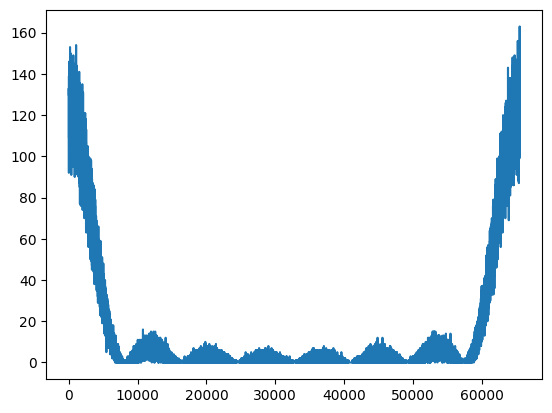

In [20]:
start = timeit.timeit()
shot_num = 1000000
simulator = AerSimulator()
QFT = transpile(QFT, simulator)
result = simulator.run(QFT,shots = shot_num).result()
counts = result.get_counts(QFT)
end = timeit.timeit()
print(['time elapsed: ' + str(end - start) + ' sec'])
af.plot_counts(counts, bit_size)